In [1]:
import matplotlib as mpl
mpl.use('Agg')

from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

import matplotlib.pyplot as plt

import massmapper as mm
import numpy as np
import random

%matplotlib inline

In [2]:
masswidth=0.5
n=200
catalog_kind='subhalo'

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree


121120 halos in range. Evaluating a sample of 200.
generating family trees for 200 main progenitors


100% |########################################################################|


<Figure size 432x288 with 0 Axes>

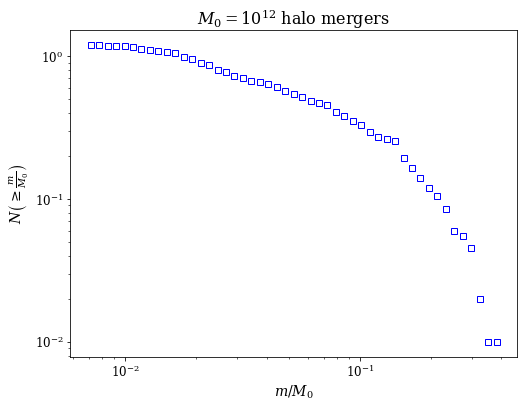

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree


13280 halos in range. Evaluating a sample of 200.
generating family trees for 200 main progenitors


100% |########################################################################|


<Figure size 432x288 with 0 Axes>

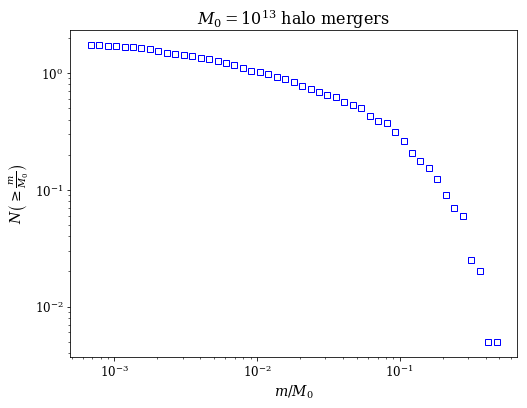

In [3]:
cat12=mm.Mergerdata(12.,masswidth,catalog_kind=catalog_kind,n=n)
cat12.gendistribution()
cat13=mm.Mergerdata(13.,masswidth,catalog_kind=catalog_kind,n=n)
cat13.gendistribution()

In [4]:
Nbins=50.

def N_gmratio(cat):
    lowerbound=min(cat.mratios)
    upperbound=max(cat.mratios)
    bins=np.logspace(np.log10(lowerbound),np.log10(upperbound),Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    N=plt.hist(cat.mratios,bins)[0]
    plt.clf()

    N=N/len(cat.halis[0])
    N_gmratio=np.array([N[i:].sum() for i in np.arange(len(N))]) #N(>=m/m0) --- avg number of mergers that occured with ratios greater than or equal to the given m/m0
    
    return N_gmratio,midbins

def prob_mw(cat):
    lowerbound=min(cat.mratios)
    upperbound=max(cat.mratios)
    bins=np.logspace(np.log10(lowerbound),np.log10(upperbound),Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    N=plt.hist(cat.mratios,bins)[0]
    plt.clf()
    
    binwid=np.average(np.log10(bins[1:]/bins[:-1])) #bin width in dex
    
    P=N/len(cat.mratios)/binwid
    P_mw=P*midbins*10.**cat.mhal0

    return P_mw,midbins

<Figure size 432x288 with 0 Axes>

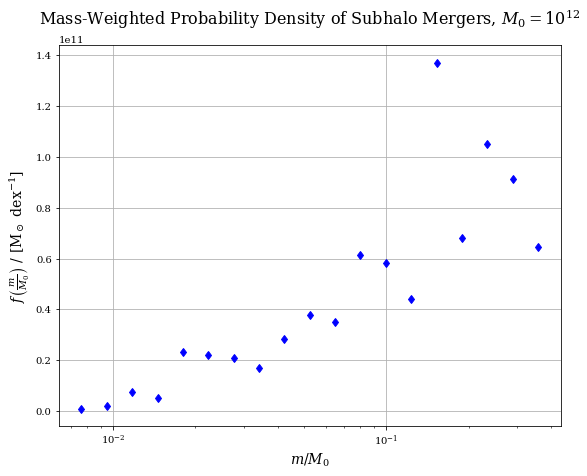

In [12]:
Nbins=20.

P_mw12,midbins12=prob_mw(cat12)
#P_mw13,midbins12=prob_mw(cat13)

fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(1,1,1)

ax.semilogx(midbins12,P_mw12,'db')
#ax.semilogx(midbins13,P_mw13,'dr')
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$f\\left(\\frac{m}{M_0}\\right)$ / [M$_\odot$ dex$^{-1}]$',fontsize=14)
ax.set_title('Mass-Weighted Probability Density of Subhalo Mergers'
             ', $M_0=10^{{{0:0.0f}}}$'
             .format(cat12.mhal0),
             fontsize=16,y=1.04)
ax.grid()
plt.show()

In [6]:
N_gmratio12,midbins12= N_gmratio(cat12)
N_gmratio13,midbins13= N_gmratio(cat13)

<Figure size 432x288 with 0 Axes>

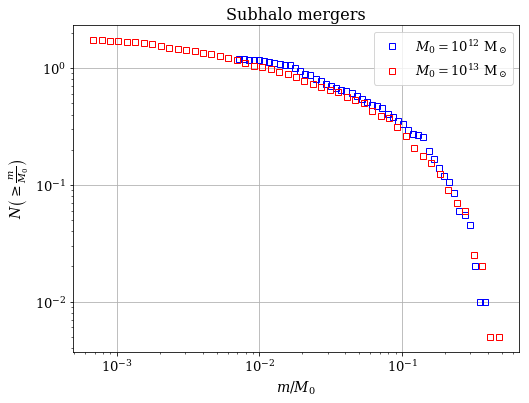

In [10]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_gmratio12,'s',mec='b',mfc='None',label='$M_0=10^{12}$ M$_\odot$')
ax.loglog(midbins13,N_gmratio13,'s',mec='r',mfc='None',label='$M_0=10^{13}$ M$_\odot$')

#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo mergers',fontsize=16)
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$N\left(\geq\\frac{m}{M_0}\\right)$',fontsize=14)
#ax.set_xlim(10.**-3.,10.**-0.3)
#ax.set_ylim(10.**-1.,10**1.65)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=13)
ax.grid()

plt.show()

## The following is the distribution of all accreted mass, not just halos

100% |########################################################################|


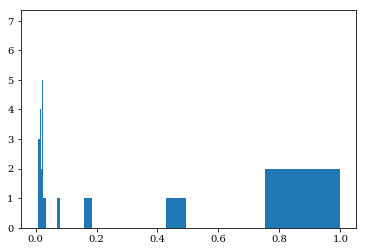

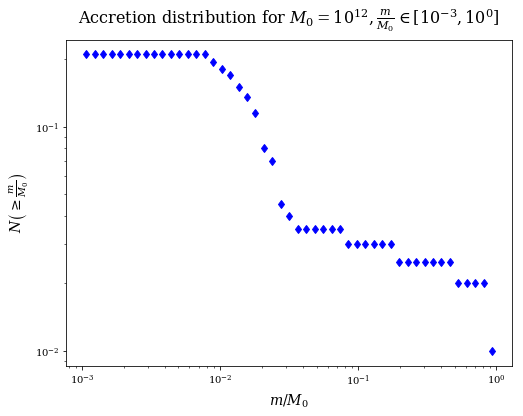

In [8]:
cat12.populatemap()
m1array,m0array,mergerratioarray=cat12.genaccdist()

loglower=-3.
logupper=0.
bins=np.logspace(loglower,logupper,50.)
midbins=(bins[1:]+bins[:-1])/2
N=plt.hist(mergerratioarray,bins=bins)[0]
#plt.clf()

N=N/len(cat12.halis[0])
N_geqmratio=np.array([N[i:].sum() for i in np.arange(len(N))])
plt.figure(figsize=(8,6))
plt.loglog(midbins,N_geqmratio,'bd')
plt.title('Accretion distribution for '
          '$M_0=10^{{{0:0.0f}}}, \\frac{{m}}{{M_0}}$'
          '$\in [10^{{{1:0.0f}}}, 10^{{{2:0.0f}}}]$'
          .format(cat12.mhal0,
                  loglower,
                  logupper),fontsize=16,y=1.03)
plt.xlabel('$m/M_0$',fontsize=14)
plt.ylabel('$N\left(\geq\\frac{m}{M_0}\\right)$',fontsize=14)
plt.show()